In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import models, optimizers, losses, metrics, layers
from keras.utils import to_categorical
import numpy as np
from google.colab import drive
import pandas as pd
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
# load_spam_data
def load_spam_data(df):
    df = pd.read_csv(df, header=None)
    df = df.values
    not_spam, spam = np.split(df, np.where(np.diff(df[:,57]))[0]+1)
    train_ns_emails = not_spam[:1500]
    test_ns_emails = not_spam[1500:]
    train_s_emails = spam[:2500]
    test_s_emails = spam[2500:]
    train_data = np.vstack([train_ns_emails,train_s_emails])[:,:57]
    test_data = np.vstack([test_ns_emails,test_s_emails])[:,:57]
    train_labels = np.vstack([train_ns_emails,train_s_emails])[:,57]
    test_labels = np.vstack([test_ns_emails,test_s_emails])[:,57]
    return (train_data,train_labels),(test_data,test_labels)

# Step 1: Load the data
(train_emails,train_labels),(test_emails,test_labels) = load_spam_data("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data")

In [5]:
# Step 2: Prepare the data
mean = train_emails.mean(axis = 0)
std = train_emails.std(axis=0)
train_emails -= mean
train_emails /= std
test_emails -= mean
test_emails /= std
train_labels = np.asarray(train_labels).astype("float32")
test_labels = np.asarray(test_labels).astype("float32")

In [10]:
# Step 3: Create validation set
val_emails = train_emails[:500]
partial_emails_train = train_emails[500:]
val_labels = train_labels[:500]
partial_labels_train = train_labels[500:]


(500, 57)


In [36]:
# Step 4 and 7: Build the network and tuning the hyper-parameters
model = models.Sequential()
model.add(layers.Dense(8, activation="relu",input_shape=(57,)))
model.add(layers.Dense(8, activation="tanh"))
model.add(layers.Dense(1, activation="sigmoid",))

In [37]:
# Step 5 and 7: Compile the model and tuning the hyper-parameters
model.compile(optimizer = optimizers.RMSprop(lr=0.001), loss = losses.binary_crossentropy, metrics = [metrics.binary_accuracy])

In [38]:
# Step 6: Training and validation
history = model.fit(partial_emails_train,partial_labels_train,epochs = 40, batch_size = 32, validation_data =(val_emails,val_labels))

Epoch 1/40
110/110 [==============================] - 1s 4ms/step - loss: 0.5947 - binary_accuracy: 0.7048 - val_loss: 0.6535 - val_binary_accuracy: 0.6320
Epoch 2/40
110/110 [==============================] - 0s 3ms/step - loss: 0.2981 - binary_accuracy: 0.8983 - val_loss: 0.5370 - val_binary_accuracy: 0.7620
Epoch 3/40
110/110 [==============================] - 0s 3ms/step - loss: 0.2198 - binary_accuracy: 0.9207 - val_loss: 0.4480 - val_binary_accuracy: 0.8420
Epoch 4/40
110/110 [==============================] - 0s 3ms/step - loss: 0.1872 - binary_accuracy: 0.9325 - val_loss: 0.4029 - val_binary_accuracy: 0.8640
Epoch 5/40
110/110 [==============================] - 0s 3ms/step - loss: 0.1742 - binary_accuracy: 0.9372 - val_loss: 0.3573 - val_binary_accuracy: 0.8840
Epoch 6/40
110/110 [==============================] - 0s 3ms/step - loss: 0.1502 - binary_accuracy: 0.9439 - val_loss: 0.3387 - val_binary_accuracy: 0.8900
Epoch 7/40
110/110 [==============================] - 0s 3ms/ste

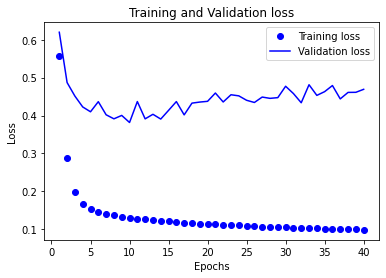

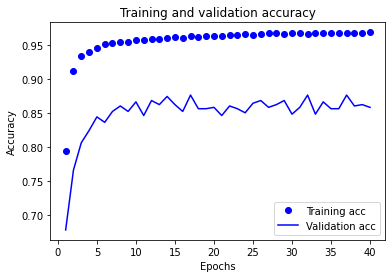

In [29]:
# Plotting the graph
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label="Training loss")
plt.plot(epochs, val_loss,"b",label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc_values = history.history['binary_accuracy']
val_acc_values = history.history['val_binary_accuracy']
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
# Step 8: Retraining the final model
model = models.Sequential()
model.add(layers.Dense(8, activation="relu",input_shape=(57,)))
model.add(layers.Dense(8, activation="tanh"))
model.add(layers.Dense(1, activation="sigmoid",))
model.compile(optimizer = optimizers.RMSprop(lr=0.001), loss = losses.binary_crossentropy, metrics = [metrics.binary_accuracy])
history = model.fit(partial_emails_train,partial_labels_train,epochs = 14, batch_size = 32, validation_data =(val_emails,val_labels))
results = model.evaluate(test_emails,test_labels)

Epoch 1/14
110/110 [==============================] - 1s 4ms/step - loss: 0.5468 - binary_accuracy: 0.7632 - val_loss: 0.7723 - val_binary_accuracy: 0.5080
Epoch 2/14
110/110 [==============================] - 0s 3ms/step - loss: 0.3311 - binary_accuracy: 0.8841 - val_loss: 0.5495 - val_binary_accuracy: 0.7860
Epoch 3/14
110/110 [==============================] - 0s 3ms/step - loss: 0.2231 - binary_accuracy: 0.9291 - val_loss: 0.4281 - val_binary_accuracy: 0.8540
Epoch 4/14
110/110 [==============================] - 0s 3ms/step - loss: 0.1763 - binary_accuracy: 0.9408 - val_loss: 0.3903 - val_binary_accuracy: 0.8660
Epoch 5/14
110/110 [==============================] - 0s 3ms/step - loss: 0.1578 - binary_accuracy: 0.9439 - val_loss: 0.3811 - val_binary_accuracy: 0.8720
Epoch 6/14
110/110 [==============================] - 0s 3ms/step - loss: 0.1546 - binary_accuracy: 0.9472 - val_loss: 0.3927 - val_binary_accuracy: 0.8580
Epoch 7/14
110/110 [==============================] - 0s 3ms/ste

In [42]:
print(results)

[0.45378729701042175, 0.8668885231018066]


In [43]:
model.save("/content/drive/MyDrive/CS 577/AS1/Q3.h5")